In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import time

import datetime as datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('merged_Floor7.csv')#,index_col=0)
df

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux)
0,2018-07-01 00:00:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,0.00,29.40,65.16,0.0,0.0,0.0,0.03,28.93,66.72,0.0
1,2018-07-01 00:01:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,0.00,29.30,65.17,0.0,0.0,0.0,0.03,28.92,66.70,0.0
2,2018-07-01 00:02:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,0.00,29.30,65.18,0.0,0.0,0.0,0.05,28.92,66.70,0.0
3,2018-07-01 00:03:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,0.00,29.30,65.18,0.0,0.0,0.0,0.14,28.92,66.70,0.0
4,2018-07-01 00:04:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.44,0.0,...,0.00,29.40,65.18,0.0,0.0,0.0,0.13,28.92,66.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.00,0.0,0.0,0.05,27.93,53.80,0.0,...,0.07,28.50,55.96,0.0,0.0,0.0,0.03,29.43,52.86,0.0
790556,2019-12-31 23:56:00,0.0,0.01,0.00,0.0,0.0,0.05,27.94,53.83,0.0,...,0.07,28.49,55.96,0.0,0.0,0.0,0.03,29.43,52.87,0.0
790557,2019-12-31 23:57:00,0.0,0.01,0.00,0.0,0.0,0.05,27.93,53.84,0.0,...,0.07,28.50,56.00,0.0,0.0,0.0,0.03,29.42,52.84,0.0
790558,2019-12-31 23:58:00,0.0,0.01,0.00,0.0,0.0,0.04,27.93,53.87,0.0,...,0.07,28.49,56.10,0.0,0.0,0.0,0.03,29.41,52.87,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790560 entries, 0 to 790559
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          790560 non-null  object 
 1   z1_AC1(kW)    785711 non-null  float64
 2   z1_AC2(kW)    785711 non-null  float64
 3   z1_AC3(kW)    785711 non-null  float64
 4   z1_AC4(kW)    760272 non-null  float64
 5   z1_Light(kW)  787562 non-null  float64
 6   z1_Plug(kW)   789351 non-null  float64
 7   z1_S1(degC)   525330 non-null  float64
 8   z1_S1(RH%)    525332 non-null  float64
 9   z1_S1(lux)    525275 non-null  float64
 10  z2_AC1(kW)    760268 non-null  float64
 11  z2_Light(kW)  787562 non-null  float64
 12  z2_Plug(kW)   787214 non-null  float64
 13  z2_S1(degC)   529567 non-null  float64
 14  z2_S1(RH%)    529566 non-null  float64
 15  z2_S1(lux)    529563 non-null  float64
 16  z3_Light(kW)  788364 non-null  float64
 17  z3_Plug(kW)   786896 non-null  float64
 18  z4_A

In [4]:
df['date_only'] = df['Date'].str.split(pat=' ').str[0]
df

,Date,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),...,z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux),date_only
0,2018-07-01 00:00:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,29.40,65.16,0.0,0.0,0.0,0.03,28.93,66.72,0.0,2018-07-01
1,2018-07-01 00:01:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,29.30,65.17,0.0,0.0,0.0,0.03,28.92,66.70,0.0,2018-07-01
2,2018-07-01 00:02:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,29.30,65.18,0.0,0.0,0.0,0.05,28.92,66.70,0.0,2018-07-01
3,2018-07-01 00:03:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.42,0.0,...,29.30,65.18,0.0,0.0,0.0,0.14,28.92,66.70,0.0,2018-07-01
4,2018-07-01 00:04:00,0.0,0.00,0.01,0.0,0.0,0.02,28.23,64.44,0.0,...,29.40,65.18,0.0,0.0,0.0,0.13,28.92,66.70,0.0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.00,0.0,0.0,0.05,27.93,53.80,0.0,...,28.50,55.96,0.0,0.0,0.0,0.03,29.43,52.86,0.0,2019-12-31
790556,2019-12-31 23:56:00,0.0,0.01,0.00,0.0,0.0,0.05,27.94,53.83,0.0,...,28.49,55.96,0.0,0.0,0.0,0.03,29.43,52.87,0.0,2019-12-31
790557,2019-12-31 23:57:00,0.0,0.01,0.00,0.0,0.0,0.05,27.93,53.84,0.0,...,28.50,56.00,0.0,0.0,0.0,0.03,29.42,52.84,0.0,2019-12-31
790558,2019-12-31 23:58:00,0.0,0.01,0.00,0.0,0.0,0.04,27.93,53.87,0.0,...,28.49,56.10,0.0,0.0,0.0,0.03,29.41,52.87,0.0,2019-12-31


In [5]:
df2 = df[df['date_only'] == '2018-07-01'].drop('Date',axis=1)
df2

,z1_AC1(kW),z1_AC2(kW),z1_AC3(kW),z1_AC4(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),...,z4_S1(degC),z4_S1(RH%),z4_S1(lux),z5_AC1(kW),z5_Light(kW),z5_Plug(kW),z5_S1(degC),z5_S1(RH%),z5_S1(lux),date_only
0,0.0,0.0,0.01,0.0,0.0,0.02,28.23,64.42,0.0,0.0,...,29.40,65.16,0.0,0.0,0.0,0.03,28.93,66.72,0.0,2018-07-01
1,0.0,0.0,0.01,0.0,0.0,0.02,28.23,64.42,0.0,0.0,...,29.30,65.17,0.0,0.0,0.0,0.03,28.92,66.70,0.0,2018-07-01
2,0.0,0.0,0.01,0.0,0.0,0.02,28.23,64.42,0.0,0.0,...,29.30,65.18,0.0,0.0,0.0,0.05,28.92,66.70,0.0,2018-07-01
3,0.0,0.0,0.01,0.0,0.0,0.02,28.23,64.42,0.0,0.0,...,29.30,65.18,0.0,0.0,0.0,0.14,28.92,66.70,0.0,2018-07-01
4,0.0,0.0,0.01,0.0,0.0,0.02,28.23,64.44,0.0,0.0,...,29.40,65.18,0.0,0.0,0.0,0.13,28.92,66.70,0.0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.0,0.01,0.0,0.0,0.06,30.19,63.82,0.0,0.0,...,30.66,66.16,0.0,0.0,0.0,0.15,30.55,66.16,0.0,2018-07-01
1436,0.0,0.0,0.01,0.0,0.0,0.06,30.19,63.82,0.0,0.0,...,30.66,66.16,0.0,0.0,0.0,0.14,30.55,66.16,0.0,2018-07-01
1437,0.0,0.0,0.01,0.0,0.0,0.05,30.18,63.83,0.0,0.0,...,30.66,66.17,0.0,0.0,0.0,0.14,30.55,66.16,0.0,2018-07-01
1438,0.0,0.0,0.01,0.0,0.0,0.06,30.18,63.84,0.0,0.0,...,30.65,66.17,0.0,0.0,0.0,0.13,30.55,66.15,0.0,2018-07-01


In [6]:
date_list = df['date_only'].unique()
date_list

array(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
       '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
       '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
       '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
       '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
       '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
       '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
       '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01',
       '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05',
       '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
       '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
       '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
       '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
       '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
       '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29',
       '2018-08-30', '2018-08-31', '2018-09-01', '2018-

In [7]:
df.columns

Index(['Date', 'z1_AC1(kW)', 'z1_AC2(kW)', 'z1_AC3(kW)', 'z1_AC4(kW)',
       'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)', 'z1_S1(RH%)',
       'z1_S1(lux)', 'z2_AC1(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z4_AC1(kW)', 'z4_Light(kW)', 'z4_Plug(kW)',
       'z4_S1(degC)', 'z4_S1(RH%)', 'z4_S1(lux)', 'z5_AC1(kW)', 'z5_Light(kW)',
       'z5_Plug(kW)', 'z5_S1(degC)', 'z5_S1(RH%)', 'z5_S1(lux)', 'date_only'],
      dtype='object')

In [8]:
lights = ['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)','z5_Light(kW)']
acs = ['z1_AC1(kW)','z1_AC2(kW)','z1_AC3(kW)','z1_AC4(kW)','z2_AC1(kW)','z4_AC1(kW)', 'z5_AC1(kW)']
plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)','z5_Light(kW)']
temp=['z1_S1(degC)','z2_S1(degC)','z4_S1(degC)','z5_S1(degC)']
humd=['z1_S1(RH%)','z2_S1(RH%)','z4_S1(RH%)','z5_S1(RH%)']
amblig=['z1_S1(lux)','z2_S1(lux)','z4_S1(lux)','z5_S1(lux)']

In [9]:
df2[['z1_Light(kW)','z1_Plug(kW)']].sum()

z1_Light(kW)    430.7
z1_Plug(kW)      81.7
dtype: float64

In [10]:
data= {'light_total':np.zeros(len(date_list)),'ac_total':np.zeros(len(date_list)),'plug_total':np.zeros(len(date_list)),'temp_total':np.zeros(len(date_list)),'humd_total':np.zeros(len(date_list)),'amblight_total':np.zeros(len(date_list)),'Date':np.zeros(len(date_list))}
data

{'light_total': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [11]:
final_df = pd.DataFrame(data)
final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
final_df.iloc[0,6]

0.0

In [13]:
from tqdm import tqdm

def create_data(date_list):
    i=0
    lights = ['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)','z5_Light(kW)']
    acs = ['z1_AC1(kW)','z1_AC2(kW)','z1_AC3(kW)','z1_AC4(kW)','z2_AC1(kW)','z4_AC1(kW)', 'z5_AC1(kW)']
    plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)','z5_Light(kW)']
    temp=['z1_S1(degC)','z2_S1(degC)','z4_S1(degC)','z5_S1(degC)']
    humd=['z1_S1(RH%)','z2_S1(RH%)','z4_S1(RH%)','z5_S1(RH%)']
    amblig=['z1_S1(lux)','z2_S1(lux)','z4_S1(lux)','z5_S1(lux)']
    for date in tqdm(date_list):
        final_df.iloc[i,0] = df[df['date_only'] == date][lights].sum().sum()
        final_df.iloc[i,1] = df[df['date_only'] == date][acs].sum().sum()
        final_df.iloc[i,2] = df[df['date_only'] == date][plug].sum().sum()
        final_df.iloc[i,3] = df[df['date_only'] == date][temp].sum().sum()
        final_df.iloc[i,4] = df[df['date_only'] == date][humd].sum().sum()
        final_df.iloc[i,5] = df[df['date_only'] == date][amblig].sum().sum()
        final_df.iloc[i,6] = date
        i += 1


create_data(date_list) 

100%|████████████████████████████████████████████████████████████████████████████████| 549/549 [01:50<00:00,  4.97it/s]


In [14]:
final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Date
0,1782.33,14.40,344.90,168768.96,364392.41,25954.0,2018-07-01
1,9300.19,48998.64,4087.96,153424.46,354441.56,111567.0,2018-07-02
2,10047.07,54717.14,4551.94,143118.61,338339.63,134988.0,2018-07-03
3,9909.19,44181.14,4277.53,140726.95,327035.62,116273.0,2018-07-04
4,10473.48,55760.48,4482.41,142769.44,344881.74,132196.0,2018-07-05
...,...,...,...,...,...,...,...
544,11881.58,47838.11,4744.09,136292.72,380496.31,114016.0,2019-12-27
545,43.55,14.40,458.53,148088.86,354323.25,2049.0,2019-12-28
546,357.99,18.11,713.67,155260.66,325364.02,6564.0,2019-12-29
547,56.96,14.41,468.56,155864.46,296675.57,2454.0,2019-12-30


In [15]:
final_df['Date'] = pd.to_datetime(final_df['Date']) # convert column to datetime object
final_df.set_index('Date', inplace=True)

In [16]:
final_df.isnull().sum()

light_total       0
ac_total          0
plug_total        0
temp_total        0
humd_total        0
amblight_total    0
dtype: int64

In [17]:
final_df.dtypes

light_total       float64
ac_total          float64
plug_total        float64
temp_total        float64
humd_total        float64
amblight_total    float64
dtype: object

<AxesSubplot:xlabel='Date'>

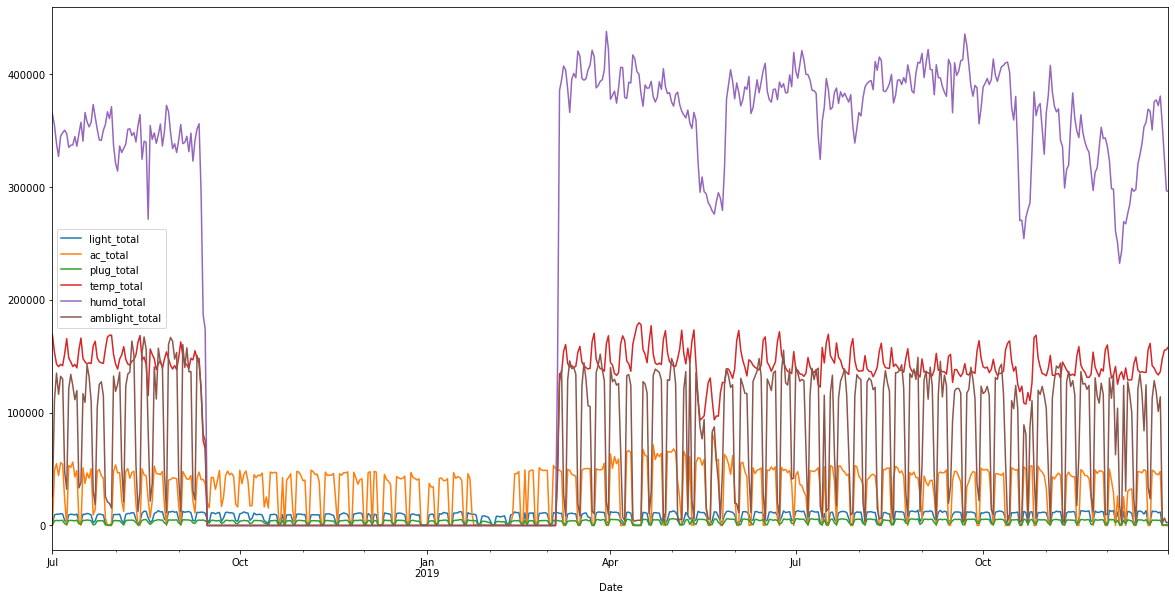

In [18]:
final_df.plot(figsize=(20,10))

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
res1=adfuller(final_df['light_total'])

In [21]:
def adfuller_test(p):
    result=adfuller(p)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [22]:
adfuller_test(final_df['light_total'])

ADF Test Statistic : -3.905247087135789
p-value : 0.001996568996132841
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

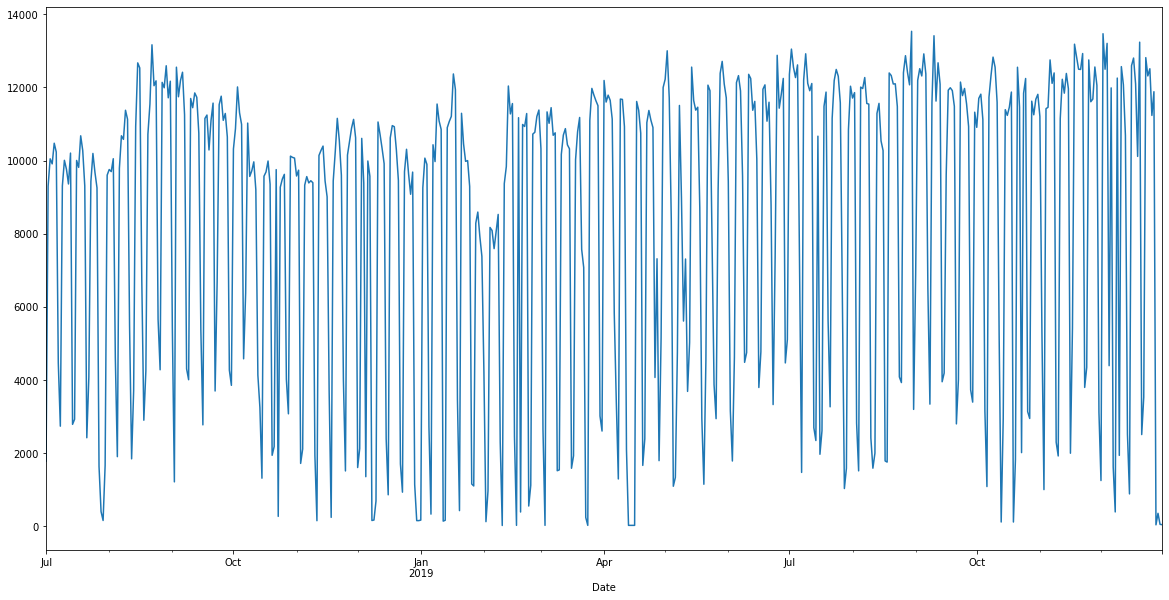

In [23]:
final_df['light_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

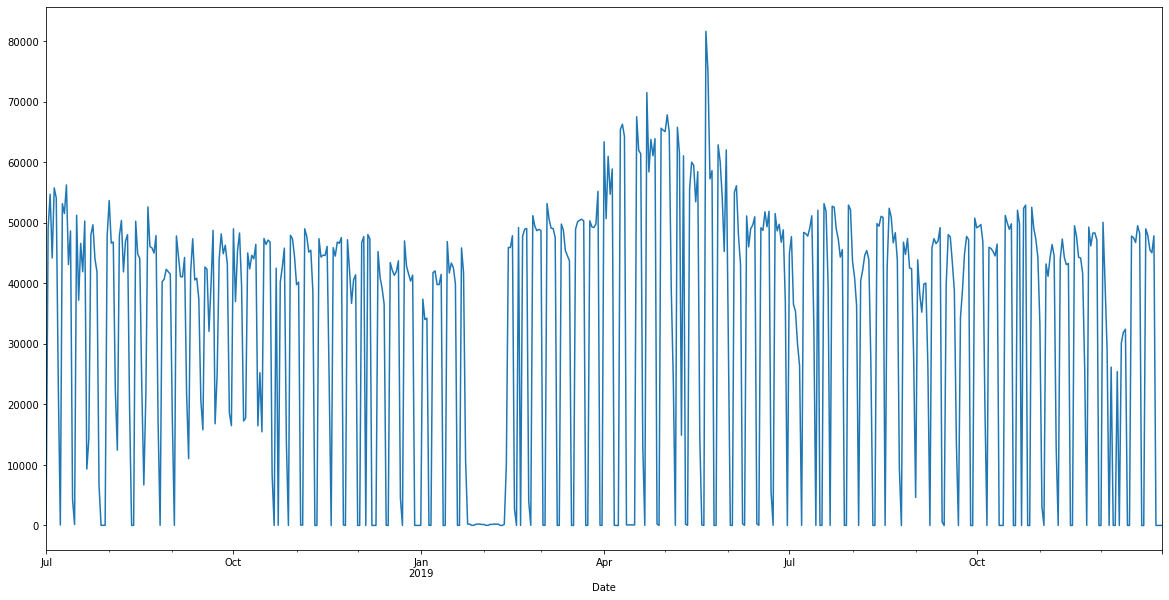

In [24]:
final_df['ac_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

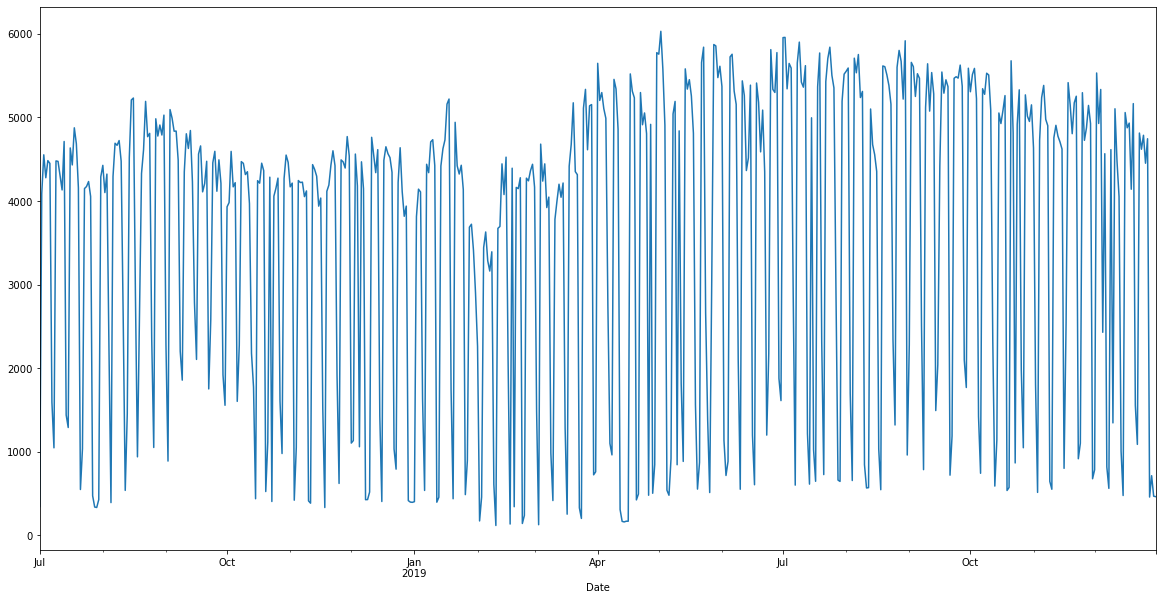

In [25]:
final_df['plug_total'].plot(figsize=(20,10))

# Autocorrelation plot for Light

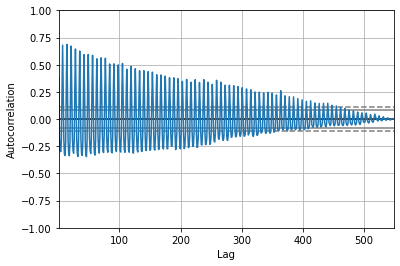

In [26]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(final_df['light_total'])
plt.show()

# Autocorrelation plot for AC

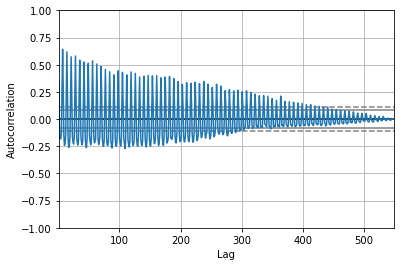

In [27]:
autocorrelation_plot(final_df['ac_total'])
plt.show()

# Autocorrelation plot for Plug

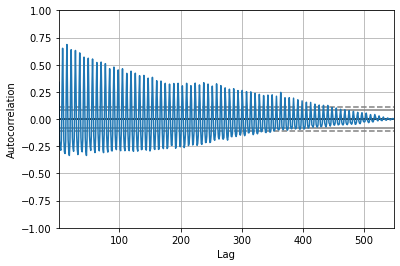

In [28]:
autocorrelation_plot(final_df['plug_total'])
plt.show()

C:\Users\yalla\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


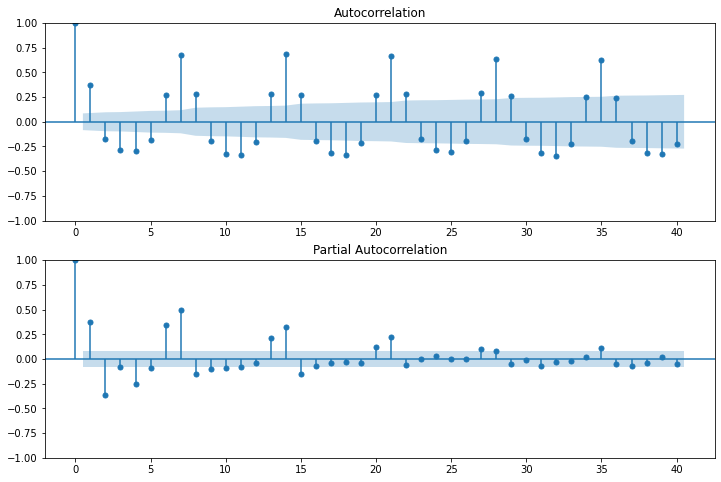

In [29]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(final_df['light_total'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(final_df['light_total'].iloc[13:],lags=40,ax=ax2)


# Arima for light_Energy consumption

In [30]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [31]:
model1=auto_arima(final_df['light_total'],trace=True,suppress_warnings=True)
model1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10553.556, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10844.128, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10844.111, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10842.129, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10576.548, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10593.362, Time=0.41 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10445.740, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10594.940, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10551.059, Time=0.51 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=10446.954, Time=0.59 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=10589.443, Time=0.36 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=10443.051, Time=0.78 sec
 ARIMA(4,1,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -5145.926
Date:                Wed, 19 Apr 2023   AIC                          10309.852
Time:                        12:29:33   BIC                          10348.608
Sample:                    07-01-2018   HQIC                         10325.000
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -31.6832     97.890     -0.324      0.746    -223.543     160.177
ar.L1          0.4322      0.043     10.087      0.000       0.348       0.516
ar.L2         -0.8074      0.042    -19.165      0.000      -0.890      -0.725
ar.L3         -0.1385      0.053     -2.636      0.008      -0.241      -0.036
ar.L4         -0.3825      0.039     -9.835      0.000      -0.459      -0.306
ar.L5         -0.3530      0.040     -8.850      0.000      -0.431      -0.275
ma.L1         -1.1773      0.023    -51.073      0.000      -1.223      -1.132
ma.L2          0.8981      0.021     42.591      0.000       0.857       0.939
sigma2      8.579e+06      0.003   2.68e+09      0.000    8.58e+06    8.58e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                63.16
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.68e+24. Standard errors may be unstable.
"""

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 6) (30, 6)


<AxesSubplot:title={'center':'Floor 7 Light Consumtion Pred'}, xlabel='Date'>

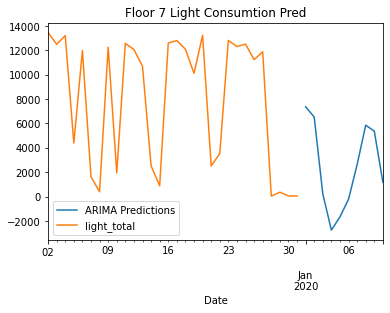

In [51]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,title='Floor 7 Light Consumtion Pred')
test['light_total'].plot(legend=True)

# Arima for AC_Energy consumption

In [35]:
model2=auto_arima(final_df['ac_total'],trace=True,suppress_warnings=True)
model2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12425.386, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12535.860, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12469.385, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12434.162, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13162.328, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12431.659, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12421.757, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12436.987, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12419.684, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12421.455, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12423.401, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12626.111, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.622 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -6205.842
Date:                Wed, 19 Apr 2023   AIC                          12419.684
Time:                        12:29:52   BIC                          12436.916
Sample:                    07-01-2018   HQIC                         12426.419
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.732e+04   1441.177     18.954      0.000    2.45e+04    3.01e+04
ar.L1          0.4475      0.047      9.620      0.000       0.356       0.539
ar.L2         -0.3004      0.048     -6.209      0.000      -0.395      -0.206
sigma2      3.838e+08      0.002   1.81e+11      0.000    3.84e+08    3.84e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                16.74
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.27
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.48e+27. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'Floor 7 AC Power Consumption Pred'}, xlabel='Date'>

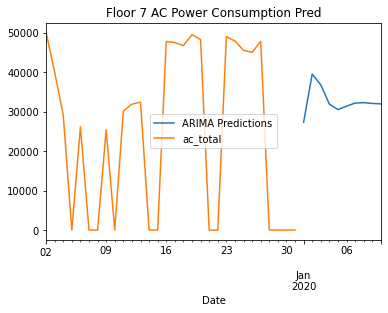

In [50]:
start=len(train)
end=len(train)+len(test)-1
pred=model2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,title='Floor 7 AC Power Consumption Pred')
test['ac_total'].plot(legend=True)

# Arima for Plug Load_Energy consumption

In [37]:
model3=auto_arima(final_df['plug_total'],trace=True,suppress_warnings=True)
model3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9656.274, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9972.943, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9970.711, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9970.944, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9702.895, Time=0.43 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9561.229, Time=0.65 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9675.216, Time=0.38 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=9660.304, Time=0.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=9568.956, Time=0.64 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=9668.786, Time=0.53 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=9551.692, Time=0.67 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=9483.3

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -4714.937
Date:                Wed, 19 Apr 2023   AIC                           9445.874
Time:                        12:30:20   BIC                           9480.324
Sample:                    07-01-2018   HQIC                          9459.339
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4116      0.041     10.063      0.000       0.331       0.492
ar.L2         -0.8174      0.044    -18.558      0.000      -0.904      -0.731
ar.L3         -0.1173      0.056     -2.084      0.037      -0.228      -0.007
ar.L4         -0.4103      0.042     -9.841      0.000      -0.492      -0.329
ar.L5         -0.3575      0.041     -8.782      0.000      -0.437      -0.278
ma.L1         -1.1547      0.024    -47.758      0.000      -1.202      -1.107
ma.L2          0.8630      0.022     38.760      0.000       0.819       0.907
sigma2      1.808e+06   8.69e-09   2.08e+14      0.000    1.81e+06    1.81e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                55.18
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.69   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.23e+29. Standard errors may be unstable.
"""

<AxesSubplot:title={'center':'Floor 7 Plug Load Pred'}, xlabel='Date'>

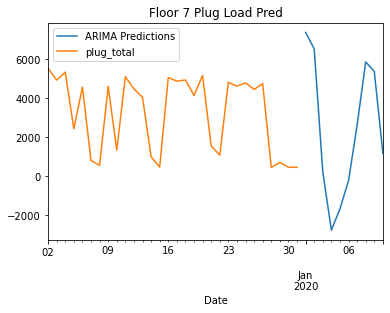

In [38]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,title='Floor 7 Plug Load Pred')
test['plug_total'].plot(legend=True)

# Total Power Consumption

In [39]:
final_df['Power Consumption']=final_df['light_total']+final_df['ac_total']+final_df['plug_total']
final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Power Consumption
Date,,,,,,,
2018-07-01,1782.33,14.40,344.90,168768.96,364392.41,25954.0,2141.63
2018-07-02,9300.19,48998.64,4087.96,153424.46,354441.56,111567.0,62386.79
2018-07-03,10047.07,54717.14,4551.94,143118.61,338339.63,134988.0,69316.15
2018-07-04,9909.19,44181.14,4277.53,140726.95,327035.62,116273.0,58367.86
2018-07-05,10473.48,55760.48,4482.41,142769.44,344881.74,132196.0,70716.37
...,...,...,...,...,...,...,...
2019-12-27,11881.58,47838.11,4744.09,136292.72,380496.31,114016.0,64463.78
2019-12-28,43.55,14.40,458.53,148088.86,354323.25,2049.0,516.48
2019-12-29,357.99,18.11,713.67,155260.66,325364.02,6564.0,1089.77


In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
res4=adfuller(final_df['Power Consumption'])

In [42]:
def adfuller_test(p):
    result=adfuller(p)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [43]:
adfuller_test(final_df['Power Consumption'])

ADF Test Statistic : -4.00836161278641
p-value : 0.0013673547490379247
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Arima For Total Power Consumption

In [44]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [45]:
model4=auto_arima(final_df['Power Consumption'],trace=True,suppress_warnings=True)
model4.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12647.937, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12773.951, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12702.933, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12658.913, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13472.945, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12658.019, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12639.961, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12661.411, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12637.490, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12638.482, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12640.174, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12864.300, Time=0.02 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.640 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -6314.745
Date:                Wed, 19 Apr 2023   AIC                          12637.490
Time:                        12:32:59   BIC                          12654.722
Sample:                    07-01-2018   HQIC                         12644.224
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.784e+04   1915.213     19.760      0.000    3.41e+04    4.16e+04
ar.L1          0.4753      0.045     10.479      0.000       0.386       0.564
ar.L2         -0.3408      0.047     -7.194      0.000      -0.434      -0.248
sigma2      5.706e+08      0.002    3.1e+11      0.000    5.71e+08    5.71e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                24.61
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.36
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.97e+28. Standard errors may be unstable.
"""

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 7) (30, 7)


<AxesSubplot:title={'center':'Floor 7 Total Power Consumption'}, xlabel='Date'>

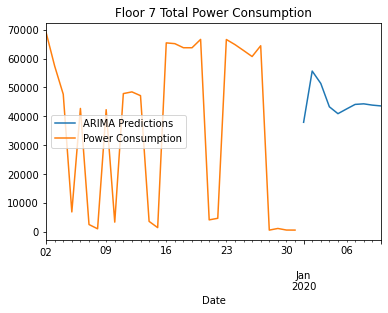

In [53]:
start=len(train)
end=len(train)+len(test)-1

pred=model4.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Floor 7 Total Power Consumption')
test['Power Consumption'].plot(legend=True)